# Mammalian Sleep EDA

This Jupyter notebook performs an exploratory data analysis (EDA) on a mammalian sleep dataset.

**Questions explored:**
1. What is the distribution of dreaming (paradoxical) sleep across species?
2. Do predator–prey danger categories show distinct dreaming‑sleep patterns?
3. How is gestational length related to dreaming‑sleep duration?
4. What proportion of mammals live less than 30 years?

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sleep_url = "https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv"
Sleep = pd.read_csv(sleep_url)


sleep_df = pd.read_csv(sleep_url)
sleep_df.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


## Distribution of Dreaming Sleep

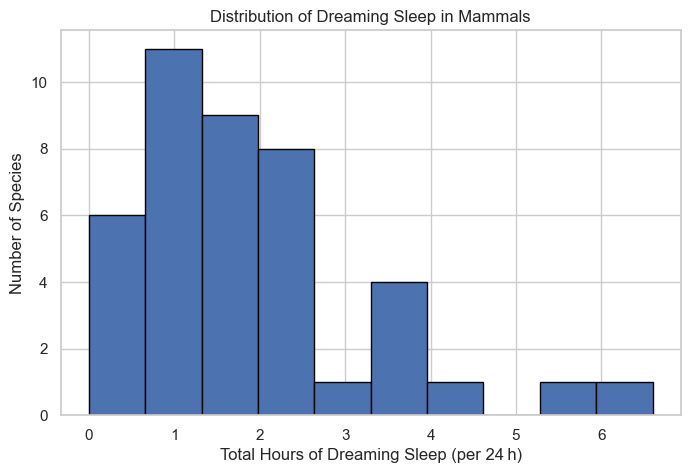

In [11]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8,5))
plt.hist(sleep_df['Parasleep'], bins=10, edgecolor='black')
plt.xlabel('Total Hours of Dreaming Sleep (per 24 h)')
plt.ylabel('Number of Species')
plt.title('Distribution of Dreaming Sleep in Mammals')
plt.show()

## Gestational Length vs Dreaming Sleep

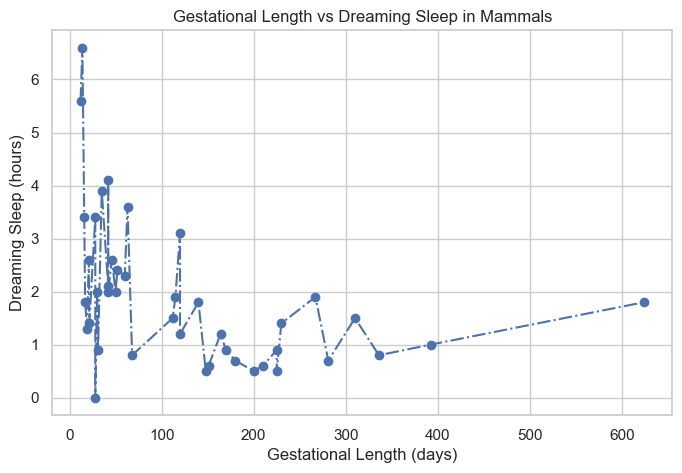

In [12]:
sorted_df = sleep_df.sort_values(by='Gest')
plt.figure(figsize=(8,5))
plt.plot(sorted_df['Gest'], sorted_df['Parasleep'], marker='o', linestyle='dashdot')
plt.xlabel('Gestational Length (days)')
plt.ylabel('Dreaming Sleep (hours)')
plt.title('Gestational Length vs Dreaming Sleep in Mammals')
plt.show()

## Lifespan Categories (< 30 years vs ≥ 30 years)

C:\Users\UserOne\AppData\Local\Temp\ipykernel_18480\226350563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Short_life', kind='count', data=sleep_df, palette='muted', height=5, aspect=1.4)


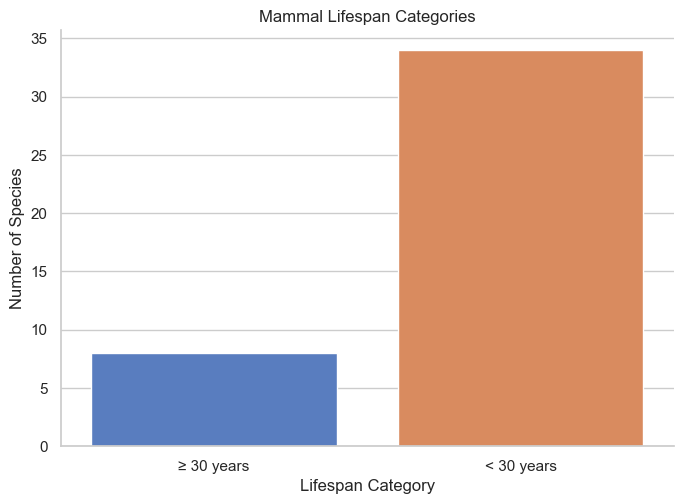

In [13]:
sleep_df['Short_life'] = sleep_df['Life'] < 30
sns.catplot(x='Short_life', kind='count', data=sleep_df, palette='muted', height=5, aspect=1.4)
plt.ylabel('Number of Species')
plt.xlabel('Lifespan Category')
plt.title('Mammal Lifespan Categories')
plt.xticks(ticks=[0,1], labels=['≥ 30 years', '< 30 years'])
plt.show()

## Summary Statistics

In [14]:
print('Dreaming sleep descriptive statistics:')
print(sleep_df['Parasleep'].describe())

danger_pct = sleep_df['Danger'].value_counts(normalize=True).mul(100).round(1)
print('\nPercentage of species in each danger category:')
for level, pct in danger_pct.sort_index().items():
    print(f'  Danger {level}: {pct}%')

corr = sleep_df[['Gest','Parasleep']].corr().loc['Gest','Parasleep']
print(f'\nPearson correlation (Gestation vs Dreaming Sleep): {corr:.2f}')

short_life_share = (sleep_df['Life'] < 30).mean() * 100
print(f'Species with lifespan < 30 years: {short_life_share:.1f}%')

Dreaming sleep descriptive statistics:
count    42.000000
mean      1.900000
std       1.388805
min       0.000000
25%       0.900000
50%       1.650000
75%       2.375000
max       6.600000
Name: Parasleep, dtype: float64

Percentage of species in each danger category:
  Danger 1: 26.2%
  Danger 2: 23.8%
  Danger 3: 16.7%
  Danger 4: 21.4%
  Danger 5: 11.9%

Pearson correlation (Gestation vs Dreaming Sleep): -0.41
Species with lifespan < 30 years: 81.0%


## Conclusions & Next Steps
* Dreaming sleep varies widely among mammals.
* Gestational length shows a modest inverse relationship with dreaming‑sleep duration.
* A majority of species in the dataset live fewer than 30 years.

Further work could involve building predictive models of sleep characteristics or extending the analysis with additional ecological variables.